In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Fruits.csv")

In [3]:
df

,Fruit,T,H,CO,D,Spoiled
0,Banana,24,60,401,5,Yes
1,Banana,22,55,399,6,Yes
2,Banana,25,50,400,5,Yes
3,Banana,21,45,398,7,Yes
4,Banana,19,52,403,7,Yes
...,...,...,...,...,...,...
245,Lemon,22,69,398,5,No
246,Lemon,23,70,400,4,No
247,Lemon,24,72,401,3,No
248,Lemon,21,76,404,4,No


In [4]:
df1 = pd.get_dummies(df["Spoiled"])
df1
df_two = pd.concat((df, df1), axis=1)
df_two = df_two.drop(["Spoiled"], axis=1)
df_two = df_two.drop(["No"],axis=1)
df2 = df_two.rename(columns={"Yes": "Spoiled"})
df2
 

,Fruit,T,H,CO,D,Spoiled
0,Banana,24,60,401,5,1
1,Banana,22,55,399,6,1
2,Banana,25,50,400,5,1
3,Banana,21,45,398,7,1
4,Banana,19,52,403,7,1
...,...,...,...,...,...,...
245,Lemon,22,69,398,5,0
246,Lemon,23,70,400,4,0
247,Lemon,24,72,401,3,0
248,Lemon,21,76,404,4,0


In [5]:
df_one = pd.get_dummies(df2["Fruit"])
print(df_one)

     Apple  Banana  Banana   Grapes  Grapes   Jackfruit  Jackfruit   Lemon  \
0        0       0        1       0        0          0           0      0   
1        0       1        0       0        0          0           0      0   
2        0       1        0       0        0          0           0      0   
3        0       1        0       0        0          0           0      0   
4        0       1        0       0        0          0           0      0   
..     ...     ...      ...     ...      ...        ...         ...    ...   
245      0       0        0       0        0          0           0      1   
246      0       0        0       0        0          0           0      1   
247      0       0        0       0        0          0           0      1   
248      0       0        0       0        0          0           0      1   
249      0       0        0       0        0          0           0      1   

     Litchi  Mango  Mango   Papaya  Plum  Tomato  
0         0 

In [6]:
df2 = pd.concat((df_one, df2), axis=1)
df2 = df2.drop(["Fruit"], axis=1)

In [7]:
df2

,Apple,Banana,Banana,Grapes,Grapes,Jackfruit,Jackfruit,Lemon,Litchi,Mango,Mango,Papaya,Plum,Tomato,T,H,CO,D,Spoiled
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,24,60,401,5,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,22,55,399,6,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25,50,400,5,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,45,398,7,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,19,52,403,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22,69,398,5,0
246,0,0,0,0,0,0,0,1,0,0,0,0,0,0,23,70,400,4,0
247,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,72,401,3,0
248,0,0,0,0,0,0,0,1,0,0,0,0,0,0,21,76,404,4,0


In [8]:
x = df2.drop('Spoiled',axis = 1).copy()
x

,Apple,Banana,Banana,Grapes,Grapes,Jackfruit,Jackfruit,Lemon,Litchi,Mango,Mango,Papaya,Plum,Tomato,T,H,CO,D
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,24,60,401,5
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,22,55,399,6
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25,50,400,5
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,45,398,7
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,19,52,403,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22,69,398,5
246,0,0,0,0,0,0,0,1,0,0,0,0,0,0,23,70,400,4
247,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,72,401,3
248,0,0,0,0,0,0,0,1,0,0,0,0,0,0,21,76,404,4


In [9]:
y = df2['Spoiled'].copy()
y

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: Spoiled, Length: 250, dtype: uint8

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.66


In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

Text(24.0, 0.5, 'Truth')

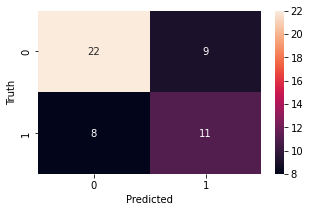

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
from sklearn.linear_model import LogisticRegression
mylogregmodel = LogisticRegression()
adabc = AdaBoostClassifier(n_estimators=50,base_estimator=mylogregmodel, learning_rate=1, random_state=0)

In [16]:
model = adabc.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.64


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        31
           1       1.00      0.05      0.10        19

    accuracy                           0.64        50
   macro avg       0.82      0.53      0.44        50
weighted avg       0.77      0.64      0.52        50

